In [1]:
from pathlib import Path
import os
import json

In [2]:
def get_text(path):
    # files = {}
    whole_text = ''
    for file in Path(path).glob('*_processed.txt'):
        file_id = str(file).split('\\')[-1].split('_')[0]
        with open(file, 'r', encoding='utf-8') as f:
            # files[int(file_id)] = f.read()
            whole_text += f.read() + ' \n '
    print(path, ' Corpus length: ', len(whole_text.split()))
    return whole_text


def get_lem_idioms():
    with open(r"D:\Python\diploma\idioms_lemmatized.json", 'r', encoding='utf-8') as f:
        idioms = json.load(f)
    print(len(idioms))
    return idioms


def find_sem(semma, sort_by='Speaking'):
    global LITERATURE, SPEAKING, NEWS, IDIOMS
    sem_idioms = []
    for idiom in IDIOMS:
        dict_abbrs = {}
        for sem in idiom['semantics']:
            if sem['dictionary'] == 'Myurrey':
                continue
            if sem['dictionary'] not in dict_abbrs:
                dict_abbrs[sem['dictionary']] = []
            dict_abbrs[sem['dictionary']].extend(sem['abbr'])
        
        if not dict_abbrs:
            continue

        if len(dict_abbrs) <= 1:    # should be used with 'any' only
            continue

        if any(semma in v for v in dict_abbrs.values()):  # all -> когда все согласны c semma, any -> хотя бы один
            set_phrases = [idi.split() for idi in set(idiom['phrase'])]
            sem_idioms.append([' '.join(phrase) for phrase in set_phrases
                               if phrase[1:] not in set_phrases and phrase[1:] != ''
                               and phrase[2:] not in set_phrases and phrase[2:] != ''
                               and phrase[:-1] not in set_phrases and phrase[:-1] != ''
                              and phrase[:-2] not in set_phrases and phrase[:-2] != ''])
    print(f'Число идиом с пометой {semma}: ', len(sem_idioms))

    reses = {}
    for idiom in sem_idioms:
        reses[idiom[0]] = {'Literature': 0, 'Speaking': 0, 'News': 0}
        for phrase in idiom:
            for corpus, name in zip([LITERATURE, SPEAKING, NEWS], ['Literature', 'Speaking', 'News']):
                reses[idiom[0]][name] += corpus.count(phrase)

    reses = dict(sorted(reses.items(), key=lambda item: item[1][sort_by], reverse=True))   # choose corpus according to semma
    return reses


def write_file(file_name, reses):
    with open(f'D:\\Python\\diploma\\results\\{file_name}.txt', 'w', encoding='utf-8') as f:
        for idiom, res in reses.items():
            f.write(idiom+'\n')
            for corpus, number in res.items():
                f.write(f'\t{corpus}: {number}\n')

def dump_json(file_name, reses):
     with open(f"D:\\Python\\diploma\\results\\{file_name}.json", 'w', encoding='utf-8') as f:
        json.dump(reses, f, ensure_ascii=False, indent=4)

In [3]:
IDIOMS = get_lem_idioms()

LITERATURE = get_text(r'D:\Python\diploma\literature\articles')
SPEAKING = get_text(r'D:\Python\diploma\speaking\subtitles')
NEWS = get_text(r'D:\Python\diploma\newspaper\news_clean')

17839
D:\Python\diploma\literature\articles  Corpus length:  1078271
D:\Python\diploma\speaking\subtitles  Corpus length:  1029625
D:\Python\diploma\newspaper\news_clean  Corpus length:  1008252


In [4]:
def get_val_reses(reses, quantifier=2):
    valuable_reses = {}
    for idiom, res in reses.items():
        if res['Literature']*quantifier < res['Speaking'] and res['News']*quantifier < res['Speaking']:
            valuable_reses[idiom] = res
    print('Number of valuable results: ', len(valuable_reses))
    valuable_reses = dict(sorted(valuable_reses.items(), key=lambda item: item[1]['Speaking'], reverse=True))
    return valuable_reses

In [5]:
def get_val_zero_clear(reses, quantifier=2):
    valuable_reses = {}
    for idiom, res in reses.items():
        if any([ress == 0 for ress in res.values()]):
            continue
        if res['Literature']*quantifier < res['Speaking'] and res['News']*quantifier < res['Speaking']:
            valuable_reses[idiom] = res
    print('Number of valuable results: ', len(valuable_reses))
    valuable_reses = dict(sorted(valuable_reses.items(), key=lambda item: item[1]['Speaking'], reverse=True))
    return valuable_reses

# Validate разг

In [6]:
import statistics

def get_stats(data):
    data_speaking = [res['Speaking'] for res in data.values()]
    data_literature = [res['Literature'] for res in data.values()]
    data_news = [res['News'] for res in data.values()]
    
    print(f'Mean: \
          \n\tSpeaking: {statistics.mean(data_speaking)} \
          \n\tLiterature: {statistics.mean(data_literature)} \
          \n\tNews: {statistics.mean(data_news)}\n')
    
    print(f'Median: \
          \n\tSpeaking: {statistics.median(data_speaking)} \
          \n\tLiterature: {statistics.median(data_literature)} \
          \n\tNews: {statistics.median(data_news)}\n')
    
    print(f'Mode: \
          \n\tSpeaking: {statistics.mode(data_speaking)} \
          \n\tLiterature: {statistics.mode(data_literature)} \
          \n\tNews: {statistics.mode(data_news)}\n')
    
    data_speaking_notnull = [res['Speaking'] for res in data.values() if res['Speaking'] > 0]
    data_literature_notnull = [res['Literature'] for res in data.values() if res['Literature'] > 0]
    data_news_notnull = [res['News'] for res in data.values() if res['News'] > 0]
    
    print(f'Mean not zero: \
          \n\tSpeaking: {statistics.mean(data_speaking_notnull)} \
          \n\tLiterature: {statistics.mean(data_literature_notnull)} \
          \n\tNews: {statistics.mean(data_news_notnull)}\n')
    
    print(f'Median not zero: \
          \n\tSpeaking: {statistics.median(data_speaking_notnull)} \
          \n\tLiterature: {statistics.median(data_literature_notnull)} \
          \n\tNews: {statistics.median(data_news_notnull)}\n')
    
    print(f'Mode not zero: \
          \n\tSpeaking: {statistics.mode(data_speaking_notnull)} \
          \n\tLiterature: {statistics.mode(data_literature_notnull)} \
          \n\tNews: {statistics.mode(data_news_notnull)}\n')

In [7]:
def other_stats(data):
    data_speaking = [res['Speaking'] for res in data.values()]
    data_literature = [res['Literature'] for res in data.values()]
    data_news = [res['News'] for res in data.values()]
    
    print(f'Population standard deviation of data: \
          \n\tSpeaking: {statistics.pstdev(data_speaking)} \
          \n\tLiterature: {statistics.pstdev(data_literature)} \
          \n\tNews: {statistics.pstdev(data_news)}\n')
    
    print(f'Population variance of data: \
          \n\tSpeaking: {statistics.pvariance(data_speaking)} \
          \n\tLiterature: {statistics.pvariance(data_literature)} \
          \n\tNews: {statistics.pvariance(data_news)}\n')

In [8]:
import scipy.stats as ss

def scipy_stats(data):
    data_speaking = [res['Speaking'] for res in data.values()]
    data_literature = [res['Literature'] for res in data.values()]
    data_news = [res['News'] for res in data.values()]
    '''
    print(f'Description: \
          \n\tSpeaking: {ss.describe(data_speaking)} \
          \n\t\t{ss.zscore(data_speaking)} \
          \n\tLiterature: {ss.describe(data_literature)} \
          \n\t\t{ss.zscore(data_literature)} \
          \n\tNews: {ss.describe(data_news)} \
          \n\t\t{ss.zscore(data_news)} \\n')'''
    
    print(f'Description: \
          \n\tSpeaking: {ss.describe(data_speaking)} \
          \n\tLiterature: {ss.describe(data_literature)} \
          \n\tNews: {ss.describe(data_news)}\\n')
    
    plt.plot(ss.zscore(data_speaking))

In [9]:
def count_data(reses, quantifier=2):
    # count accuracy TP / Total
    # mean count in all corpora?
    # median, moda
    
    total_num = len(reses)
    total_not_nul = total_num - len([res['Speaking'] for res in reses.values() 
                                     if res['Speaking'] == 0 and res['Literature'] == 0 and res['News'] == 0])
    valuable_reses = {}
    for idiom, res in reses.items():
        
        if res['Literature'] == 0 and res['News'] == 0: # не забываем менять корпуса на нужные
            if res['Speaking'] >= quantifier:
                valuable_reses[idiom] = res
            continue
        
        if res['Literature']*quantifier <= res['Speaking'] and res['News']*quantifier <= res['Speaking']: # не забываем менять корпуса на нужные
            valuable_reses[idiom] = res
    
    print(f'Number of valuable, total results, total not zero: {len(valuable_reses)}, {total_num}, {total_not_nul}')
    print('Accuracy: ', len(valuable_reses)/total_num, ' /// ', len(valuable_reses)/total_num*100, '%\n')
    print('Accuracy non-zero: ', len(valuable_reses)/total_not_nul, ' /// ', len(valuable_reses)/total_not_nul*100, '%\n')
    get_stats(reses)
    
    valuable_reses = dict(sorted(valuable_reses.items(), key=lambda item: item[1]['Speaking'], reverse=True))
    return valuable_reses

In [38]:
res_colloquial_any = find_sem('разг')
list(res_colloquial_any.items())[:5]

Число идиом с пометой разг:  3153


[('я ты', {'Literature': 1669, 'Speaking': 5116, 'News': 877}),
 ('а то', {'Literature': 2403, 'Speaking': 2390, 'News': 1028}),
 ('то-то', {'Literature': 1564, 'Speaking': 1606, 'News': 245}),
 ('что же', {'Literature': 663, 'Speaking': 1545, 'News': 146}),
 ('к что', {'Literature': 731, 'Speaking': 1068, 'News': 242})]

In [49]:
val_reses_any = count_data(res_colloquial_any)
print(*list(val_reses_any.items())[:10], sep='\n')

Number of valuable, total results, total not zero: 369, 3116, 1793
Accuracy:  0.11842105263157894  ///  11.842105263157894 %

Accuracy non-zero:  0.20580033463469047  ///  20.580033463469046 %

Mean:           
	Speaking: 9.752888318356868           
	Literature: 7.787227214377407           
	News: 3.8058408215661106

Median:           
	Speaking: 0.0           
	Literature: 0.0           
	News: 0.0

Mode:           
	Speaking: 0           
	Literature: 0           
	News: 0

Mean not zero:           
	Speaking: 24.64720194647202           
	Literature: 17.258179231863444           
	News: 19.797996661101838

Median not zero:           
	Speaking: 3           
	Literature: 3.0           
	News: 2

Mode not zero:           
	Speaking: 1           
	Literature: 1           
	News: 1

('я ты', {'Literature': 1669, 'Speaking': 5116, 'News': 877})
('что же', {'Literature': 663, 'Speaking': 1545, 'News': 146})
('вот так', {'Literature': 206, 'Speaking': 534, 'News': 21})
('я думать', {'Lite

Description:           
	Speaking: DescribeResult(nobs=3118, minmax=(0, 5116), mean=9.779987171263631, variance=13210.573972152542, skewness=33.10967499167286, kurtosis=1331.5690482577181)           
		[44.43327598 20.71218484 13.88997814 ... -0.08510344 -0.08510344
 -0.08510344]           
	Literature: DescribeResult(nobs=3118, minmax=(0, 2403), mean=7.927517639512508, variance=4494.832088221538, skewness=24.886541910092884, kurtosis=744.978540407664)           
		[24.78001139 35.72988176 23.21361304 ... -0.11826334 -0.11826334
 -0.11826334]           
	News: DescribeResult(nobs=3118, minmax=(0, 1610), mean=3.8264913406029506, variance=1875.3497375089082, skewness=25.36126256637352, kurtosis=780.0597572421723)           
		[20.16643214 23.65386187  5.57003751 ... -0.08837496 -0.08837496
 -0.08837496] \n


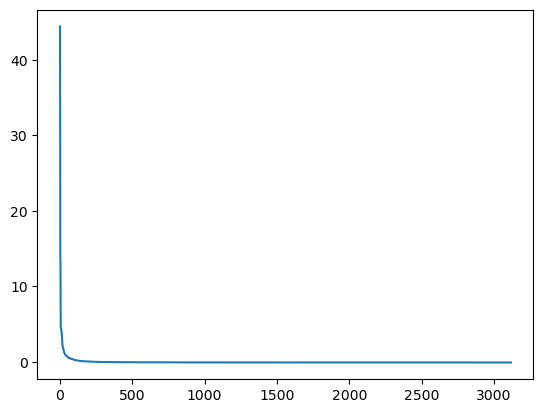

In [70]:
scipy_stats(res_colloquial_any)

In [73]:
from scipy.stats import chisquare

data_speaking = [res['Speaking'] for res in res_colloquial_any.values()]
data_literature = [res['Literature'] for res in res_colloquial_any.values()]
data_news = [res['News'] for res in res_colloquial_any.values()]

print(chisquare(data_speaking))
print(chisquare(data_literature))
print(chisquare(data_news))

Power_divergenceResult(statistic=4210369.436085788, pvalue=0.0)
Power_divergenceResult(statistic=1767311.3143458208, pvalue=0.0)
Power_divergenceResult(statistic=1527630.565836896, pvalue=0.0)


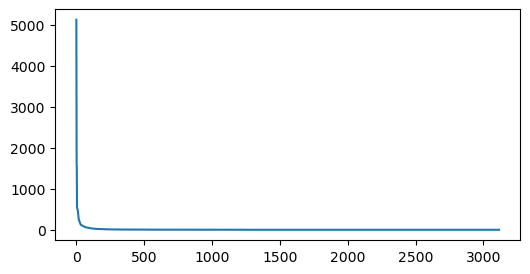

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,3))
data_speaking = [res['Speaking'] for res in res_colloquial_any.values()]
plt.plot(data_speaking)

<Figure size 600x300 with 0 Axes>

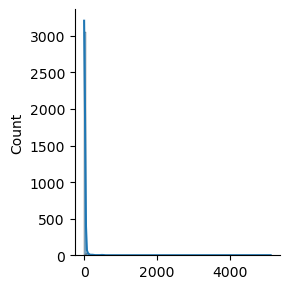

In [13]:
import seaborn as sns
plt.figure(figsize=(6,3))
data_speaking = [res['Speaking'] for res in res_colloquial_any.values()]
sns.displot(data_speaking, bins=82, height=3, kde=True);

<Figure size 600x300 with 0 Axes>

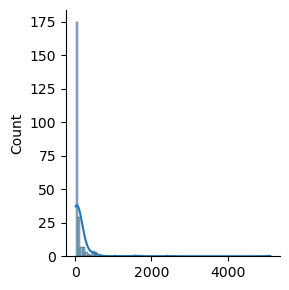

In [14]:
plt.figure(figsize=(6,3))
data_speaking = [res['Speaking'] for res in res_colloquial_any.values() if res['Speaking'] > 10]
sns.displot(data_speaking, bins=82, height=3, kde=True);

In [40]:
def count_more(reses):
    
    total_num = len(reses)
    total_not_nul = total_num - len([res['Speaking'] for res in reses.values() 
                                     if res['Speaking'] == 0 and res['Literature'] == 0 and res['News'] == 0])
    differences = {'News': [], 'Literature': []}
    valuable_reses = {}
    for idiom, res in reses.items():

        if res['Literature'] < res['Speaking'] and res['News'] < res['Speaking']: # не забываем менять корпуса на нужные
            valuable_reses[idiom] = res
            differences['News'].append(res['Speaking']-res['News'])
            differences['Literature'].append(res['Speaking']-res['Literature'])
    
    print(f'Number of valuable, total, non-zero total results: {len(valuable_reses)}, {total_num}, {total_not_nul}')
    print('Accuracy: ', len(valuable_reses)/total_num, ' /// ', len(valuable_reses)/total_num*100)
    print('Accuracy non-zero: ', len(valuable_reses)/total_not_nul, ' /// ', len(valuable_reses)/total_not_nul*100, '%')
    print('Mean Literature difference, std: ', sum(differences['Literature'])/len(differences['Literature']),
         statistics.stdev(differences['Literature']))
    print('Mean News difference, std: ', sum(differences['News'])/len(differences['News']),
         statistics.stdev(differences['News']), '\n')

    get_stats(reses)
    
    valuable_reses = dict(sorted(valuable_reses.items(), key=lambda item: item[1]['Speaking'], reverse=True))
    return valuable_reses

In [41]:
val_colloq_simple = count_more(res_colloquial_any)

Number of valuable, total, non-zero total results: 674, 3116, 1793
Accuracy:  0.21630295250320924  ///  21.630295250320923
Accuracy non-zero:  0.3759063022866704  ///  37.59063022866704 %
Mean Literature difference, std:  19.140949554896142 142.59048694947288
Mean News difference, std:  29.077151335311573 189.23063118925316 

Mean:           
	Speaking: 9.752888318356868           
	Literature: 7.787227214377407           
	News: 3.8058408215661106

Median:           
	Speaking: 0.0           
	Literature: 0.0           
	News: 0.0

Mode:           
	Speaking: 0           
	Literature: 0           
	News: 0

Mean not zero:           
	Speaking: 24.64720194647202           
	Literature: 17.258179231863444           
	News: 19.797996661101838

Median not zero:           
	Speaking: 3           
	Literature: 3.0           
	News: 2

Mode not zero:           
	Speaking: 1           
	Literature: 1           
	News: 1



In [52]:
zeros = [phr for phr, res in res_colloquial_any.items() if res['Speaking'] == 0 and res['Literature'] == 0 and res['News'] == 0]
len(zeros)

1323

In [53]:
zeros

['а быть ли мальчик',
 'а ларчик просто открываться',
 'ад кромешный',
 'небо жарко',
 'антик с гвоздика',
 'артист погорелый театр',
 'аршин с шапка',
 'ахи охи',
 'ахнуть не успевать',
 'бабушка ворожить',
 'бедовый голова',
 'без мыло влезать',
 'без путь',
 'без руль и без ветрило',
 'ни сучок ни задоринка',
 'без царь в голова',
 'без чин',
 'белый билет',
 'разбередить старый рана',
 'бередить сердце',
 'березовый каша',
 'бесструнный балалайка',
 'битие себя в грудь',
 'бить баклуши',
 'бить как обух по голова',
 'бить на эффект',
 'бить наверняка',
 'бить некого',
 'бить отбой',
 'лазить по карман',
 'бить рубль',
 'биться смертный бой',
 'биться голова о стена',
 'биться как рыба об лед',
 'биться насмерть',
 'бродить в потемки',
 'бог не выдавать',
 'боек на язык',
 'божий одуванчик',
 'брать в переплет',
 'брать голый рука',
 'взять за горло',
 'брать за душа',
 'взять на измор',
 'брать на карандаш',
 'взять на прицел',
 'взять под крыло',
 'взять под обстрел',
 'брать с бо

Description:           
	Speaking: DescribeResult(nobs=3116, minmax=(0, 5116), mean=9.752888318356868, variance=13213.038755699883, skewness=33.12178983192047, kurtosis=1331.9585206634458)           
	Literature: DescribeResult(nobs=3116, minmax=(0, 2403), mean=7.787227214377407, variance=4423.623092020268, skewness=25.391093720704685, kurtosis=769.084718981315)           
	News: DescribeResult(nobs=3116, minmax=(0, 1610), mean=3.8058408215661106, variance=1874.6804281531454, skewness=25.390823633080217, kurtosis=781.1676597901462)\n


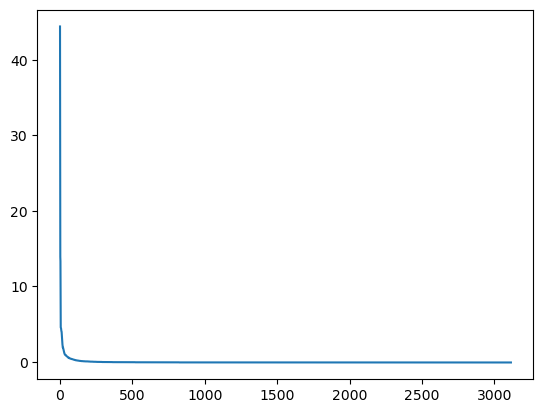

In [65]:
scipy_stats(res_colloquial_any)

# Validate книжн

In [10]:
def count_data(reses, quantifier=2):
    
    total_num = len(reses)
    total_not_nul = total_num - len([res['Literature'] for res in reses.values() 
                                     if res['Speaking'] == 0 and res['Literature'] == 0 and res['News'] == 0])
    valuable_reses = {}
    for idiom, res in reses.items():
        
        if res['Speaking'] == 0 and res['News'] == 0: # не забываем менять корпуса на нужные
            if res['Literature'] >= quantifier:
                valuable_reses[idiom] = res
            continue
        
        if res['Speaking']*quantifier < res['Literature'] and res['News']*quantifier < res['Literature']: # не забываем менять корпуса на нужные
            valuable_reses[idiom] = res
    
    print(f'Number of valuable, total results: {len(valuable_reses)}, {total_num}')
    print('Accuracy: ', len(valuable_reses)/total_num, ' /// ', len(valuable_reses)/total_num*100, '\n')
    print('Accuracy non-zero: ', len(valuable_reses)/total_not_nul, ' /// ', len(valuable_reses)/total_not_nul*100, '%\n')
    get_stats(reses)
    
    valuable_reses = dict(sorted(valuable_reses.items(), key=lambda item: item[1]['Literature'], reverse=True))
    return valuable_reses

In [11]:
res_book = find_sem('книжн')
list(res_book.items())[:5]

Число идиом с пометой книжн:  470


[('в честь', {'Literature': 40, 'Speaking': 28, 'News': 32}),
 ('в лицо', {'Literature': 70, 'Speaking': 23, 'News': 21}),
 ('в свет', {'Literature': 51, 'Speaking': 19, 'News': 21}),
 ('в сторона', {'Literature': 491, 'Speaking': 19, 'News': 84}),
 ('точка зрение', {'Literature': 15, 'Speaking': 14, 'News': 77})]

In [45]:
val_book = count_data(res_book)
print(*list(val_book.items())[:10], sep='\n')

Number of valuable, total results: 45, 470
Accuracy:  0.09574468085106383  ///  9.574468085106384 

Accuracy non-zero:  0.23076923076923078  ///  23.076923076923077 %

Mean:           
	Speaking: 0.6063829787234043           
	Literature: 2.5148936170212766           
	News: 1.7808510638297872

Median:           
	Speaking: 0.0           
	Literature: 0.0           
	News: 0.0

Mode:           
	Speaking: 0           
	Literature: 0           
	News: 0

Mean not zero:           
	Speaking: 3.3529411764705883           
	Literature: 8.208333333333334           
	News: 8.628865979381443

Median not zero:           
	Speaking: 2           
	Literature: 2.0           
	News: 2

Mode not zero:           
	Speaking: 1           
	Literature: 1           
	News: 1

('в сторона', {'Literature': 491, 'Speaking': 19, 'News': 84})
('в лицо', {'Literature': 70, 'Speaking': 23, 'News': 21})
('в свет', {'Literature': 51, 'Speaking': 19, 'News': 21})
('время от время', {'Literature': 50, 'Speaking': 

<Figure size 600x300 with 0 Axes>

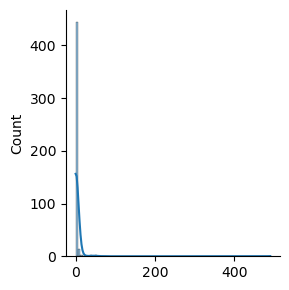

In [20]:
plt.figure(figsize=(6,3))
data_book = [res['Literature'] for res in res_book.values()]
sns.displot(data_book, bins=82, height=3, kde=True);

In [12]:
def count_more(reses):
    
    total_num = len(reses)
    total_not_nul = total_num - len([res['Literature'] for res in reses.values() 
                                     if res['Speaking'] == 0 and res['Literature'] == 0 and res['News'] == 0])
    differences = {'News': [], 'Speaking': []}
    valuable_reses = {}
    for idiom, res in reses.items():

        if res['Speaking'] < res['Literature'] and res['News'] < res['Literature']: # не забываем менять корпуса на нужные
            valuable_reses[idiom] = res
            differences['News'].append(res['Literature']-res['News'])
            differences['Speaking'].append(res['Literature']-res['Speaking'])
    
    print(f'Number of valuable, total results, total not zero: {len(valuable_reses)}, {total_num}, {total_not_nul}')
    print('Accuracy: ', len(valuable_reses)/total_num, ' /// ', len(valuable_reses)/total_num*100)
    print('Accuracy non-zero: ', len(valuable_reses)/total_not_nul, ' /// ', len(valuable_reses)/total_not_nul*100, '%')
    print('Mean Speaking difference, std: ', sum(differences['Speaking'])/len(differences['Speaking']),
         statistics.stdev(differences['Speaking']))
    print('Mean News difference, std: ', sum(differences['News'])/len(differences['News']),
         statistics.stdev(differences['News']), '\n')
    get_stats(reses)
    
    valuable_reses = dict(sorted(valuable_reses.items(), key=lambda item: item[1]['Literature'], reverse=True))
    return valuable_reses

In [61]:
val_book_simple = count_more(res_book)

Number of valuable, total results, total not zero: 93, 470, 195
Accuracy:  0.19787234042553192  ///  19.78723404255319
Accuracy non-zero:  0.47692307692307695  ///  47.69230769230769 %
Mean Speaking difference, std:  9.46236559139785 49.21085050460548
Mean News difference, std:  8.795698924731182 42.537594405671456 

Mean:           
	Speaking: 0.6063829787234043           
	Literature: 2.5148936170212766           
	News: 1.7808510638297872

Median:           
	Speaking: 0.0           
	Literature: 0.0           
	News: 0.0

Mode:           
	Speaking: 0           
	Literature: 0           
	News: 0

Mean not zero:           
	Speaking: 3.3529411764705883           
	Literature: 8.208333333333334           
	News: 8.628865979381443

Median not zero:           
	Speaking: 2           
	Literature: 2.0           
	News: 2

Mode not zero:           
	Speaking: 1           
	Literature: 1           
	News: 1



Description:           
	Speaking: DescribeResult(nobs=470, minmax=(0, 28), mean=0.6063829787234043, variance=5.834074309304542, skewness=7.440094657021471, kurtosis=65.54453092596893)           
	Literature: DescribeResult(nobs=470, minmax=(0, 491), mean=2.5148936170212766, variance=542.8899696048629, skewness=19.779560248349657, kurtosis=410.05508741856386)           
	News: DescribeResult(nobs=470, minmax=(0, 101), mean=1.7808510638297872, variance=83.49771355986029, skewness=8.006077271458247, kurtosis=69.37047529925213)\n


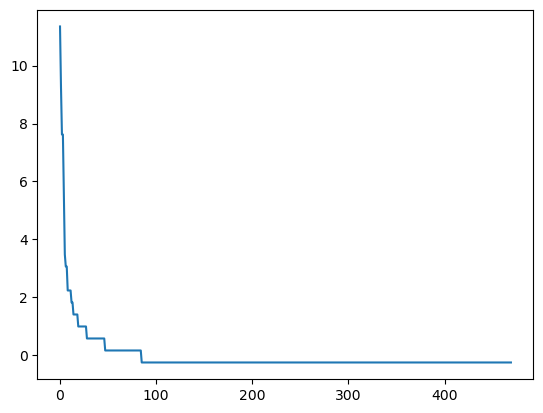

In [64]:
scipy_stats(res_book)

In [13]:
zeros = [phr for phr, res in res_book.items() if res['Speaking'] == 0 and res['Literature'] == 0 and res['News'] == 0]
len(zeros)

275

In [14]:
zeros

['адамов яблоко',
 'альфа и омега',
 'ангел во плоть',
 'аннибалов клятва',
 'ариаднина нить',
 'аркадский идиллия',
 'аттический соль',
 'ахиллесов пята',
 'багрити рука в кровь',
 'без милосердие',
 'без руль и без ветрило',
 'божий суд',
 'больной вопрос',
 'бочка данаида',
 'бочка диоген',
 'бросать перчатка',
 'буриданов осел',
 'буря в стакан вода',
 'в воздух носиться',
 'в природа вещь',
 'вавилонский башня',
 'вавилонский блудница',
 'варфоломеевский ночь',
 'вечный жид',
 'вечный покой',
 'вкушать от пища святой антоний',
 'вкушать плод',
 'властитель дума',
 'во всеоружие',
 'во сто крат',
 'воевать с ветряной мельница',
 'возводить в квадрат',
 'возводить в перл создание',
 'возрождаться из пепел',
 'волк в овечий шкура',
 'воскурять фимиам',
 'воспрянуть ото сон',
 'восставать из пепел',
 'вписывать новый страница',
 'все течь все меняться',
 'весь фибры душа',
 'вступать в строй',
 'вызывать к жизнь',
 'выходить из-под кисть',
 'выходить из-под перо',
 'высоко держать зна

In [21]:
def sort_diff(reses, sort_by='Speaking'):
    
    new_reses = {}
    
    for idiom, res in reses.items():
        new_res = {name:res['Literature']-val for name, val in res.items()}
        new_reses[idiom] = new_res
    
    sorted_reses = dict(sorted(new_reses.items(), key=lambda item: item[1][sort_by], reverse=True))
    return sorted_reses

In [20]:
sorted_book = sort_diff(res_book)
sorted_book

{'в сторона': {'Literature': 0, 'Speaking': 472, 'News': 407},
 'в лицо': {'Literature': 0, 'Speaking': 47, 'News': 49},
 'от время до время': {'Literature': 0, 'Speaking': 46, 'News': 38},
 'в расцвет год': {'Literature': 0, 'Speaking': 36, 'News': 39},
 'в свет': {'Literature': 0, 'Speaking': 32, 'News': 30},
 'приклонять голова': {'Literature': 0, 'Speaking': 25, 'News': 25},
 'во глава': {'Literature': 0, 'Speaking': 18, 'News': -59},
 'в глубина душа': {'Literature': 0, 'Speaking': 13, 'News': 13},
 'в честь': {'Literature': 0, 'Speaking': 12, 'News': 8},
 'в уста': {'Literature': 0, 'Speaking': 10, 'News': -23},
 'помнить себя': {'Literature': 0, 'Speaking': 10, 'News': 10},
 'на покой': {'Literature': 0, 'Speaking': 8, 'News': 11},
 'паче то': {'Literature': 0, 'Speaking': 8, 'News': 8},
 'на уста': {'Literature': 0, 'Speaking': 7, 'News': -17},
 'смотреть в глаз': {'Literature': 0, 'Speaking': 7, 'News': 10},
 'идти навстречу': {'Literature': 0, 'Speaking': 6, 'News': -2},
 'по

In [22]:
sorted_book2 = sort_diff(res_book, 'News')
sorted_book2

{'в сторона': {'Literature': 0, 'Speaking': 472, 'News': 407},
 'в лицо': {'Literature': 0, 'Speaking': 47, 'News': 49},
 'в расцвет год': {'Literature': 0, 'Speaking': 36, 'News': 39},
 'от время до время': {'Literature': 0, 'Speaking': 46, 'News': 38},
 'в свет': {'Literature': 0, 'Speaking': 32, 'News': 30},
 'приклонять голова': {'Literature': 0, 'Speaking': 25, 'News': 25},
 'в глубина душа': {'Literature': 0, 'Speaking': 13, 'News': 13},
 'на покой': {'Literature': 0, 'Speaking': 8, 'News': 11},
 'смотреть в глаз': {'Literature': 0, 'Speaking': 7, 'News': 10},
 'помнить себя': {'Literature': 0, 'Speaking': 10, 'News': 10},
 'в честь': {'Literature': 0, 'Speaking': 12, 'News': 8},
 'паче то': {'Literature': 0, 'Speaking': 8, 'News': 8},
 'расположение дух': {'Literature': 0, 'Speaking': 6, 'News': 7},
 'раб божий': {'Literature': 0, 'Speaking': -2, 'News': 6},
 'суета суета': {'Literature': 0, 'Speaking': 4, 'News': 6},
 'в пыл': {'Literature': 0, 'Speaking': 4, 'News': 5},
 'голо

# Вся база

In [23]:
def find_max():
    global LITERATURE, SPEAKING, NEWS, IDIOMS
    reses = {}
    for idiom in IDIOMS:
        set_phrases = [idi.split() for idi in set(idiom['phrase'])]
        sem_idioms = [' '.join(phrase) for phrase in set_phrases 
                      if phrase[1:] not in set_phrases and phrase[1:] != '' and len(phrase) > 1 
                      and phrase[:-1] not in set_phrases and phrase[:-1] != '']
        
        if not sem_idioms:
            continue
    
        reses[sem_idioms[0]] = {'Literature': 0, 'Speaking': 0, 'News': 0}
        for phrase in sem_idioms:
            for corpus, name in zip([LITERATURE, SPEAKING, NEWS], ['Literature', 'Speaking', 'News']):
                reses[sem_idioms[0]][name] += corpus.count(phrase)

    #reses = dict(sorted(reses.items(), key=lambda item: item[1][sort_by], reverse=True))   # choose corpus according to semma
    return reses

In [38]:
reses_total = find_max()
get_stats(reses_total)

Mean:           
	Speaking: 5.015904114325227           
	Literature: 3.5518612423648728           
	News: 2.0150973838884405

Median:           
	Speaking: 0.0           
	Literature: 0.0           
	News: 0.0

Mode:           
	Speaking: 0           
	Literature: 0           
	News: 0

Mean not zero:           
	Speaking: 24.743035815804433           
	Literature: 15.253402623113091           
	News: 18.007209062821833

Median not zero:           
	Speaking: 2.0           
	Literature: 2           
	News: 2.0

Mode not zero:           
	Speaking: 1           
	Literature: 1           
	News: 1



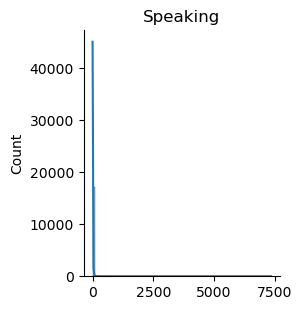

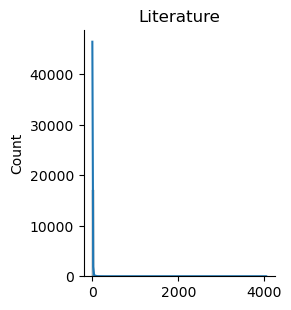

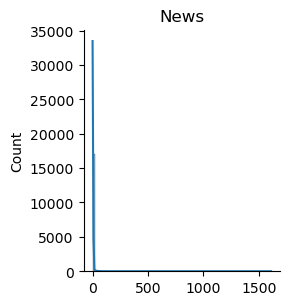

In [41]:
#plt.figure(figsize=(12,3))
#fig, axs = plt.subplots(ncols=3)
for i, corpus in enumerate(['Speaking', 'Literature', 'News']):
    data = [res[corpus] for res in reses_total.values()]
    sns.displot(data, bins=82, kde=True, height=3).set(title=corpus)  #, ax=axs[i]

# Новый раздел

In [ ]:
# Чекнуть по общим результатам (сортированные) по топ-100 сколько содержат помету в словаре
# но топ употреблений с проверкой, что больше других употреблений????

In [19]:
def find_max(sort_by='Speaking'):
    global LITERATURE, SPEAKING, NEWS, IDIOMS
    reses = {}
    for idiom in IDIOMS:
        set_phrases = [idi.split() for idi in set(idiom['phrase'])]
        sem_idioms = [' '.join(phrase) for phrase in set_phrases 
                      if phrase[1:] not in set_phrases and phrase[1:] != '' and len(phrase) > 1 
                      and phrase[:-1] not in set_phrases and phrase[:-1] != '']
        
        if not sem_idioms:
            continue
    
        reses[sem_idioms[0]] = {'Literature': 0, 'Speaking': 0, 'News': 0}
        for phrase in sem_idioms:
            for corpus, name in zip([LITERATURE, SPEAKING, NEWS], ['Literature', 'Speaking', 'News']):
                reses[sem_idioms[0]][name] += corpus.count(phrase)

    reses = dict(sorted(reses.items(), key=lambda item: item[1][sort_by], reverse=True))   # choose corpus according to semma
    return reses

In [20]:
reses_colloq = find_max('Speaking')
list(reses_colloq.items())[:10]

[('я они', {'Literature': 4046, 'Speaking': 7353, 'News': 1575}),
 ('я ты', {'Literature': 1669, 'Speaking': 5116, 'News': 877}),
 ('а что', {'Literature': 1556, 'Speaking': 3575, 'News': 376}),
 ('что ты', {'Literature': 619, 'Speaking': 3285, 'News': 118}),
 ('а ну', {'Literature': 439, 'Speaking': 2833, 'News': 65}),
 ('а то', {'Literature': 2403, 'Speaking': 2390, 'News': 1028}),
 ('что это не', {'Literature': 1079, 'Speaking': 1893, 'News': 496}),
 ('не знать', {'Literature': 722, 'Speaking': 1848, 'News': 98}),
 ('что не', {'Literature': 1046, 'Speaking': 1835, 'News': 465}),
 ('ну что', {'Literature': 168, 'Speaking': 1761, 'News': 3})]

In [21]:
reses_book = find_max('Literature')
list(reses_book.items())[:10]

[('я они', {'Literature': 4046, 'Speaking': 7353, 'News': 1575}),
 ('а то', {'Literature': 2403, 'Speaking': 2390, 'News': 1028}),
 ('я ты', {'Literature': 1669, 'Speaking': 5116, 'News': 877}),
 ('а что', {'Literature': 1556, 'Speaking': 3575, 'News': 376}),
 ('то быть', {'Literature': 1261, 'Speaking': 1175, 'News': 655}),
 ('что это не', {'Literature': 1079, 'Speaking': 1893, 'News': 496}),
 ('что не', {'Literature': 1046, 'Speaking': 1835, 'News': 465}),
 ('и то', {'Literature': 1026, 'Speaking': 579, 'News': 367}),
 ('не мочь', {'Literature': 938, 'Speaking': 1591, 'News': 349}),
 ('а вот', {'Literature': 764, 'Speaking': 1291, 'News': 106})]

In [22]:
reses_journ = find_max('News')
list(reses_journ.items())[:10]

[('в годок', {'Literature': 204, 'Speaking': 60, 'News': 1610}),
 ('в год', {'Literature': 204, 'Speaking': 60, 'News': 1610}),
 ('я они', {'Literature': 4046, 'Speaking': 7353, 'News': 1575}),
 ('а то', {'Literature': 2403, 'Speaking': 2390, 'News': 1028}),
 ('я ты', {'Literature': 1669, 'Speaking': 5116, 'News': 877}),
 ('по слово', {'Literature': 5, 'Speaking': 3, 'News': 698}),
 ('то быть', {'Literature': 1261, 'Speaking': 1175, 'News': 655}),
 ('в час', {'Literature': 69, 'Speaking': 81, 'News': 592}),
 ('при это', {'Literature': 230, 'Speaking': 21, 'News': 579}),
 ('и быть', {'Literature': 742, 'Speaking': 591, 'News': 563})]

In [44]:
def check_top(reses, label):
    global IDIOMS
    
    num_label = 0
    top_100 = [phrase for phrase, res in reses.items()][:100]
    top_counter = 0
    
    for idiom in IDIOMS:
        enough = False
        for phrase in top_100:
            if phrase not in idiom['phrase']:
                continue
            top_counter += 1
            for sem in idiom['semantics']:
                if label in sem['abbr']:
                    num_label += 1
                    enough = True
                    break
            if enough:
                break
    print('Top_counter in the end of cicle: ', top_counter)
    return num_label

In [45]:
top_book = check_top(reses_book, 'книжн')
top_book

Top_counter in the end of cicle:  129


1

In [46]:
top_coll = check_top(reses_colloq, 'разг')
top_coll

Top_counter in the end of cicle:  112


71

# Новейший раздел

In [37]:
def find_max_no_abbr(abbr, corp_name):
    global LITERATURE, SPEAKING, NEWS, IDIOMS
    reses = {}
    for idiom in IDIOMS:
        dict_abbrs = {}
        for sem in idiom['semantics']:
            if sem['dictionary'] == 'Myurrey':
                continue
            if sem['dictionary'] not in dict_abbrs:
                dict_abbrs[sem['dictionary']] = []
            dict_abbrs[sem['dictionary']].extend(sem['abbr'])
        
        if not dict_abbrs:
            continue

        if any(abbr in v for v in dict_abbrs.values()):
            continue
            
        set_phrases = [idi.split() for idi in set(idiom['phrase'])]
        sem_idioms = [' '.join(phrase) for phrase in set_phrases 
                      if len(phrase) > 1 
                      and phrase[1:] not in set_phrases and phrase[1:] != ''
                      and phrase[2:] not in set_phrases and phrase[2:] != ''
                      and phrase[:-1] not in set_phrases and phrase[:-1] != ''
                      and phrase[:-2] not in set_phrases and phrase[:-2] != '']
        
        if not sem_idioms:
            continue
        
        current_reses = {'Literature': 0, 'Speaking': 0, 'News': 0}
        for phrase in sem_idioms:
            for corpus, name in zip([LITERATURE, SPEAKING, NEWS], ['Literature', 'Speaking', 'News']):
                current_reses[name] += corpus.count(phrase)
        
        if current_reses[corp_name] > current_reses['Speaking'] and current_reses[corp_name] > current_reses['Literature']:
            reses[sem_idioms[0]] = current_reses

    reses = dict(sorted(reses.items(), key=lambda item: item[1][corp_name], reverse=True))   # choose corpus according to semma
    return reses

## Разговорные

In [32]:
reses_colloq_max = find_max_no_abbr('разг', 'Speaking')
reses_colloq_max

{'что вы': {'Literature': 619, 'Speaking': 3285, 'News': 118},
 'не знать': {'Literature': 722, 'Speaking': 1848, 'News': 98},
 'что не': {'Literature': 1046, 'Speaking': 1835, 'News': 465},
 'не мочь': {'Literature': 938, 'Speaking': 1591, 'News': 349},
 'на вы': {'Literature': 452, 'Speaking': 581, 'News': 462},
 'что за': {'Literature': 272, 'Speaking': 532, 'News': 218},
 'на ты': {'Literature': 153, 'Speaking': 521, 'News': 102},
 'до свидание': {'Literature': 21, 'Speaking': 468, 'News': 0},
 'в общий': {'Literature': 138, 'Speaking': 386, 'News': 149},
 'что такой': {'Literature': 111, 'Speaking': 368, 'News': 71},
 'надо быть': {'Literature': 182, 'Speaking': 235, 'News': 28},
 'ты сказать': {'Literature': 40, 'Speaking': 233, 'News': 0},
 'с ум': {'Literature': 62, 'Speaking': 226, 'News': 16},
 'в смысл': {'Literature': 23, 'Speaking': 177, 'News': 3},
 'добрый день': {'Literature': 14, 'Speaking': 177, 'News': 0},
 'с ум сходить': {'Literature': 21, 'Speaking': 160, 'News': 

In [35]:
len(reses_colloq_max)

917

In [63]:
zero_res_coloq = {name:res for name, res in reses_colloq_max.items() if res['News'] == 0 and res['Literature'] == 0}
print(len(zero_res_coloq))    # 56.9% от общего числа
zero_res_coloq

552


{'все все все': {'Literature': 0, 'Speaking': 53, 'News': 0},
 'чего ничего': {'Literature': 0, 'Speaking': 29, 'News': 0},
 'ваш честь': {'Literature': 0, 'Speaking': 18, 'News': 0},
 'почем я знать': {'Literature': 0, 'Speaking': 13, 'News': 0},
 'к свинья': {'Literature': 0, 'Speaking': 12, 'News': 0},
 'иметь честь': {'Literature': 0, 'Speaking': 11, 'News': 0},
 'спасать христос': {'Literature': 0, 'Speaking': 9, 'News': 0},
 'так твой': {'Literature': 0, 'Speaking': 9, 'News': 0},
 'прощение просить': {'Literature': 0, 'Speaking': 8, 'News': 0},
 'давать ключ': {'Literature': 0, 'Speaking': 8, 'News': 0},
 'не надрываться': {'Literature': 0, 'Speaking': 7, 'News': 0},
 'глядеть ты': {'Literature': 0, 'Speaking': 6, 'News': 0},
 'как штык': {'Literature': 0, 'Speaking': 6, 'News': 0},
 'синий чулок': {'Literature': 0, 'Speaking': 6, 'News': 0},
 'лезть не в свой дело': {'Literature': 0, 'Speaking': 6, 'News': 0},
 'ни во что': {'Literature': 0, 'Speaking': 5, 'News': 0},
 'по спра

In [64]:
len([res for res in zero_res_coloq.values() if res['Speaking'] == 1]) / len(zero_res_coloq) * 100

65.39855072463769

In [65]:
print(len([res for res in zero_res_coloq.values() if res['Speaking'] > 2]))
len([res for res in zero_res_coloq.values() if res['Speaking'] > 2]) / len(zero_res_coloq) * 100

79


14.31159420289855

## Книжные

In [34]:
reses_book_max = find_max_no_abbr('книжн', 'Literature')
reses_book_max

{'а то': {'Literature': 2403, 'Speaking': 2390, 'News': 1028},
 'то быть': {'Literature': 1261, 'Speaking': 1175, 'News': 655},
 'и то': {'Literature': 1026, 'Speaking': 579, 'News': 367},
 'и быть': {'Literature': 742, 'Speaking': 591, 'News': 563},
 'а еще': {'Literature': 601, 'Speaking': 432, 'News': 214},
 'так и': {'Literature': 577, 'Speaking': 518, 'News': 338},
 'да и то': {'Literature': 554, 'Speaking': 401, 'News': 387},
 'не то': {'Literature': 517, 'Speaking': 389, 'News': 374},
 'и так': {'Literature': 496, 'Speaking': 486, 'News': 208},
 'в сторона': {'Literature': 491, 'Speaking': 19, 'News': 84},
 'тот время': {'Literature': 441, 'Speaking': 88, 'News': 251},
 'все же': {'Literature': 382, 'Speaking': 118, 'News': 114},
 'на вес': {'Literature': 339, 'Speaking': 225, 'News': 138},
 'в рука': {'Literature': 332, 'Speaking': 83, 'News': 55},
 'не становиться': {'Literature': 278, 'Speaking': 120, 'News': 99},
 'быть так': {'Literature': 261, 'Speaking': 223, 'News': 59},

In [36]:
len(reses_book_max)

2272

In [57]:
zero_res_book = {name:res for name, res in reses_book_max.items() if res['News'] == 0 and res['Speaking'] == 0}
print(len(zero_res_book))    # 56.6% от общего числа
zero_res_book

1287


{'покачать голова': {'Literature': 232, 'Speaking': 0, 'News': 0},
 'подымать голова': {'Literature': 85, 'Speaking': 0, 'News': 0},
 'пожимать плечо': {'Literature': 73, 'Speaking': 0, 'News': 0},
 'махнуть рука': {'Literature': 61, 'Speaking': 0, 'News': 0},
 'сделать шаг': {'Literature': 60, 'Speaking': 0, 'News': 0},
 'сплескивать рука': {'Literature': 50, 'Speaking': 0, 'News': 0},
 'по плечо': {'Literature': 35, 'Speaking': 0, 'News': 0},
 'смотреть по сторона': {'Literature': 33, 'Speaking': 0, 'News': 0},
 'подымать глаз': {'Literature': 28, 'Speaking': 0, 'News': 0},
 'тот и дело': {'Literature': 25, 'Speaking': 0, 'News': 0},
 'склонять знамя': {'Literature': 24, 'Speaking': 0, 'News': 0},
 'с бок': {'Literature': 21, 'Speaking': 0, 'News': 0},
 'в такт': {'Literature': 20, 'Speaking': 0, 'News': 0},
 'со весь нога': {'Literature': 20, 'Speaking': 0, 'News': 0},
 'что быть сила': {'Literature': 20, 'Speaking': 0, 'News': 0},
 'черный глаз': {'Literature': 19, 'Speaking': 0, '

In [59]:
len([res for res in zero_res_book.values() if res['Literature'] == 1]) / len(zero_res_book) * 100

59.98445998445998

In [62]:
print(len([res for res in zero_res_book.values() if res['Literature'] > 2]))
len([res for res in zero_res_book.values() if res['Literature'] > 2]) / len(zero_res_book) * 100

264


20.51282051282051

## Журнальные

In [38]:
reses_journ_max = find_max_no_abbr('', 'News')
print(len(reses_journ_max))
reses_journ_max

607


{'в год': {'Literature': 204, 'Speaking': 60, 'News': 1610},
 'по слово': {'Literature': 5, 'Speaking': 3, 'News': 698},
 'в час': {'Literature': 69, 'Speaking': 81, 'News': 592},
 'при это': {'Literature': 230, 'Speaking': 21, 'News': 579},
 'в большой ход': {'Literature': 18, 'Speaking': 9, 'News': 485},
 'в тот число': {'Literature': 47, 'Speaking': 23, 'News': 483},
 'на место': {'Literature': 176, 'Speaking': 180, 'News': 482},
 'в связь': {'Literature': 20, 'Speaking': 26, 'News': 460},
 'на улица': {'Literature': 300, 'Speaking': 121, 'News': 418},
 'в частность': {'Literature': 7, 'Speaking': 1, 'News': 395},
 'принимать участие': {'Literature': 19, 'Speaking': 13, 'News': 279},
 'с год': {'Literature': 34, 'Speaking': 20, 'News': 270},
 'в случай': {'Literature': 14, 'Speaking': 43, 'News': 218},
 'молодой человек': {'Literature': 138, 'Speaking': 94, 'News': 193},
 'после это': {'Literature': 77, 'Speaking': 51, 'News': 190},
 'на пост': {'Literature': 70, 'Speaking': 30, 'Ne

In [41]:
zero_res_jr = {name:res for name, res in reses_journ_max.items() if res['Literature'] == 0 and res['Speaking'] == 0}
print(len(zero_res_jr))   # 45% от общего числа
zero_res_jr

275


{'в общий сложность': {'Literature': 0, 'Speaking': 0, 'News': 75},
 'на рост': {'Literature': 0, 'Speaking': 0, 'News': 19},
 'служитель фемида': {'Literature': 0, 'Speaking': 0, 'News': 14},
 'вступать в законный сила': {'Literature': 0, 'Speaking': 0, 'News': 14},
 'свобода слово': {'Literature': 0, 'Speaking': 0, 'News': 10},
 'под эгида': {'Literature': 0, 'Speaking': 0, 'News': 7},
 'в продолжение': {'Literature': 0, 'Speaking': 0, 'News': 6},
 'точка опора': {'Literature': 0, 'Speaking': 0, 'News': 6},
 'удельный вес': {'Literature': 0, 'Speaking': 0, 'News': 6},
 'вводить в строй': {'Literature': 0, 'Speaking': 0, 'News': 6},
 'на скамья подсудимый': {'Literature': 0, 'Speaking': 0, 'News': 5},
 'новый порядок': {'Literature': 0, 'Speaking': 0, 'News': 5},
 'садиться на мель': {'Literature': 0, 'Speaking': 0, 'News': 5},
 'проливать свет': {'Literature': 0, 'Speaking': 0, 'News': 4},
 'делить компания': {'Literature': 0, 'Speaking': 0, 'News': 4},
 'являться с повинная': {'Lite

In [44]:
len([res for res in zero_res_jr.values() if res['News'] == 1]) / len(zero_res_jr) * 100

68.0

In [45]:
len([res for res in zero_res_jr.values() if res['News'] == 2]) / len(zero_res_jr) * 100

16.363636363636363

In [48]:
len([res for res in zero_res_jr.values() if res['News'] > 2])# / len(zero_res_jr) * 100

43

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

D:\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


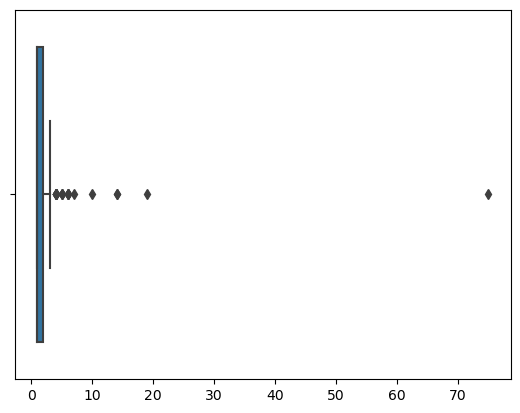

In [56]:
sns.boxplot([res['News'] for res in zero_res_jr.values()])

# Спорные ситуации

In [104]:
def find_vs(sem1, sem2, sort_by='Speaking'):
    global LITERATURE, SPEAKING, NEWS, IDIOMS
    
    sem_idioms = []
    idiom_abbr = {} # {idiom: {abbr: [authors]}}
    for idiom in IDIOMS:
        dict_abbrs = {}
        for sem in idiom['semantics']:
            if sem['dictionary'] == 'Myurrey':
                continue
            if sem['dictionary'] not in dict_abbrs:
                dict_abbrs[sem['dictionary']] = []
            dict_abbrs[sem['dictionary']].extend(sem['abbr'])
        
        if not dict_abbrs or len(dict_abbrs) <= 1:
            continue

        if any(sem1 in v for v in dict_abbrs.values()) and any(sem2 in v for v in dict_abbrs.values()):
            set_phrases = [idi.split() for idi in set(idiom['phrase'])]
            sem_idioms.append([' '.join(phrase) for phrase in set_phrases
                               if len(phrase) > 1 
                              and phrase[1:] not in set_phrases and phrase[1:] != ''
                              and phrase[2:] not in set_phrases and phrase[2:] != ''
                              and phrase[:-1] not in set_phrases and phrase[:-1] != ''
                              and phrase[:-2] not in set_phrases and phrase[:-2] != ''])       
            idiom_abbr[sem_idioms[-1][0]] = {sem1: [], sem2: []}
            for sem in idiom['semantics']:
                if sem['dictionary'] == 'Myurrey':
                    continue
                if sem1 in sem['abbr']:
                    idiom_abbr[sem_idioms[-1][0]][sem1].append(sem['dictionary'])
                elif sem2 in sem['abbr']:
                    idiom_abbr[sem_idioms[-1][0]][sem2].append(sem['dictionary'])
            
    print(f'Число идиом с пометами {sem1} и {sem2}: ', len(sem_idioms))

    reses = {}
    for idiom in sem_idioms:
        reses[idiom[0]] = {'Literature': 0, 'Speaking': 0, 'News': 0}
        for phrase in idiom:
            for corpus, name in zip([LITERATURE, SPEAKING, NEWS], ['Literature', 'Speaking', 'News']):
                reses[idiom[0]][name] += corpus.count(phrase)

    reses = dict(sorted(reses.items(), key=lambda item: item[1][sort_by], reverse=True))   # choose corpus according to semma
    return reses, idiom_abbr

In [105]:
reses_vs, abbr_authors = find_vs('разг', 'книжн')
reses_vs

Число идиом с пометами разг и книжн:  44


{'в сторона': {'Literature': 491, 'Speaking': 19, 'News': 84},
 'на почва': {'Literature': 1, 'Speaking': 3, 'News': 10},
 'гром среди ясный небо': {'Literature': 3, 'Speaking': 2, 'News': 0},
 'нет на свет': {'Literature': 1, 'Speaking': 2, 'News': 0},
 'за семь печать': {'Literature': 1, 'Speaking': 1, 'News': 0},
 'на стража': {'Literature': 2, 'Speaking': 1, 'News': 0},
 'умывать рука': {'Literature': 0, 'Speaking': 1, 'News': 1},
 'упасть пасть дух': {'Literature': 0, 'Speaking': 1, 'News': 1},
 'пункт за пункт': {'Literature': 0, 'Speaking': 1, 'News': 6},
 'совлекать с путь': {'Literature': 3, 'Speaking': 1, 'News': 1},
 'смертный грех': {'Literature': 2, 'Speaking': 1, 'News': 0},
 'без руль и без ветрило': {'Literature': 0, 'Speaking': 0, 'News': 0},
 'бить набат': {'Literature': 1, 'Speaking': 0, 'News': 0},
 'бить тревога': {'Literature': 2, 'Speaking': 0, 'News': 2},
 'буря в стакан вода': {'Literature': 0, 'Speaking': 0, 'News': 0},
 'в разрез': {'Literature': 5, 'Speaking

In [91]:
speaking = 0
literature = 0
news = 0
zeros = 0
indecisive = 0

for name, res in reses_vs.items():
    if res['Speaking'] > res['Literature'] and res['Speaking'] > res['News']:
        speaking += 1
    elif res['Literature'] > res['Speaking'] and res['Literature'] > res['News']:
        literature += 1
    elif res['News'] > res['Literature'] and res['News'] > res['Speaking']:
        news += 1
    elif sum(res.values()) == 0:
        zeros += 1
    else:
        print(name, '\t', res)
        indecisive += 1

print(f'Speaking: {speaking} ({round(speaking/len(reses_vs)*100, 2)} %)')
print(f'Literature: {literature} ({round(literature/len(reses_vs)*100, 2)} %)')
print(f'News: {news} ({round(news/len(reses_vs)*100, 2)} %)')
print(f'Zeros: {zeros} ({round(zeros/len(reses_vs)*100, 2)} %)')
print(f'Indefinite: {indecisive} ({round(indecisive/len(reses_vs)*100, 2)} %)')

за семь печать 	 {'Literature': 1, 'Speaking': 1, 'News': 0}
умывать рука 	 {'Literature': 0, 'Speaking': 1, 'News': 1}
упасть пасть дух 	 {'Literature': 0, 'Speaking': 1, 'News': 1}
бить тревога 	 {'Literature': 2, 'Speaking': 0, 'News': 2}
до скончание век 	 {'Literature': 1, 'Speaking': 0, 'News': 1}
Speaking: 1 (2.27 %)
Literature: 21 (47.73 %)
News: 4 (9.09 %)
Zeros: 13 (29.55 %)
Indefinite: 5 (11.36 %)


In [87]:
speaking = 0
literature = 0
zeros = 0
indecisive = 0

for res in reses_vs.values():
    if res['Speaking'] > res['Literature']:
        speaking += 1
    elif res['Literature'] > res['Speaking']:
        literature += 1
    elif sum(res.values()) == 0:
        zeros += 1
    else:
        indecisive += 1

print(f'Speaking: {speaking} ({round(speaking/len(reses_vs)*100, 2)} %)')
print(f'Literature: {literature} ({round(literature/len(reses_vs)*100, 2)} %)')
print(f'Zeros: {zeros} ({round(zeros/len(reses_vs)*100, 2)} %)')
print(f'Indefinite: {indecisive} ({round(indecisive/len(reses_vs)*100, 2)} %)')

Speaking: 5 (11.36 %)
Literature: 23 (52.27 %)
Zeros: 13 (29.55 %)
Indefinite: 3 (6.82 %)


In [74]:
for phrase, abbrs in abbr_authors.items():
    print(phrase, '\n\t', abbrs, '\n\t', reses_vs[phrase], '\n')

без руль и без ветрило 
	 {'разг': ['Fedorov'], 'книжн': ['Fedosov']} 
	 {'Literature': 0, 'Speaking': 0, 'News': 0} 

бить набат 
	 {'разг': ['Fedorov'], 'книжн': ['Volkova']} 
	 {'Literature': 1, 'Speaking': 0, 'News': 0} 

бить тревога 
	 {'разг': ['Fedorov'], 'книжн': ['Volkova']} 
	 {'Literature': 2, 'Speaking': 0, 'News': 2} 

буря в стакан вода 
	 {'разг': ['Volkova'], 'книжн': ['Kveselevich']} 
	 {'Literature': 0, 'Speaking': 0, 'News': 0} 

в разрез 
	 {'разг': ['Fedorov'], 'книжн': ['Volkova']} 
	 {'Literature': 5, 'Speaking': 0, 'News': 1} 

в сторона 
	 {'разг': ['Kveselevich'], 'книжн': ['Volkova']} 
	 {'Literature': 491, 'Speaking': 19, 'News': 84} 

во сто крат 
	 {'разг': ['Fedorov'], 'книжн': ['Fedorov', 'Fedosov']} 
	 {'Literature': 0, 'Speaking': 0, 'News': 0} 

воля судьба 
	 {'разг': ['Fedorov'], 'книжн': ['Fedosov', 'Kveselevich']} 
	 {'Literature': 4, 'Speaking': 0, 'News': 1} 

воспарять душа 
	 {'разг': ['Volkova'], 'книжн': ['Fedorov']} 
	 {'Literature': 1, 'S

Fedorov - X, X, X, X, X, X, X, 1(1/0/0), X, X, X, 2(1/1/0), X, X, 3(2/0/0), X, 4(1/3/10), X, 5(2/1/0), X, X, X, X, X, 6(1/2/0), 7(0/1/1), 8(4/0/0), X, X, 9(5/0/4), 10(1/0/0), 11(3/0/0), X, 12(3/1/1), X, X, 13(2/1/0), X, X, X, 14(1/0/0), X

Fedosov - X, X, 1(4/0/1), 2(1/0/1), X, X, X, X, 3(8/0/0)

Volkova - 1(1/0/0), 2(2/0/2), X, 3(5/0/1), 4(491/19/84), X, 5(5/0/0), 6(3/2/0), 7(2/0/0), 8(2/0/0), X, X, 9(2/1/0), 10(5/0/0), X, X, X, X, X, 11(4/0/0), 12(0/1/6), X, X, X, X, X, X, X

Kveselevich - X, X, 1(4/0/1), 2(1/1/0), X, X, X, X, X, 3(0/1/1), X, X, X, X, X, 4(25/0/0), X, X, 5(2/1/0), 6(8/0/0)

In [135]:
authors = {'Fedorov': 0, 'Fedosov': 0, 'Volkova': 0, 'Kveselevich': 0}
for name, res in reses_vs.items():
    if res['Speaking'] > res['Literature']:
        for author in abbr_authors[name]['разг']:
            authors[author] += 1
    
    elif res['Literature'] > res['Speaking']:
        for author in abbr_authors[name]['книжн']:
            authors[author] += 1
    
    elif res['Literature'] == res['Speaking'] and res['Literature'] > 0:
        for author in abbr_authors[name]['разг']:
            authors[author] += 1
        for author in abbr_authors[name]['книжн']:
            authors[author] += 1
            
authors_sum = {'Fedorov': 0, 'Fedosov': 0, 'Volkova': 0, 'Kveselevich': 0}
for phrase, abbrs in abbr_authors.items():
    for abbr in abbrs.values():
        for author in set(abbr):
            authors_sum[author] += 1

print(authors, authors_sum, {name: round(authors[name]/authors_sum[name]*100, 2) for name in authors}, sep='\n')

{'Fedorov': 14, 'Fedosov': 3, 'Volkova': 12, 'Kveselevich': 7}
{'Fedorov': 43, 'Fedosov': 9, 'Volkova': 28, 'Kveselevich': 20}
{'Fedorov': 32.56, 'Fedosov': 33.33, 'Volkova': 42.86, 'Kveselevich': 35.0}


In [84]:
[name for name, res in reses_vs.items() if sum(res.values()) == 0]   # 13

['без руль и без ветрило',
 'буря в стакан вода',
 'во сто крат',
 'кровь от кровь',
 'лить слеза',
 'накаливать атмосфера',
 'несть число',
 'ни на один йота',
 'под пята',
 'превращаться в слух',
 'на пища святой антоний',
 'сходить в могила',
 'стучаться в дверь дверь']

In [85]:
{name: res for name, res in reses_vs.items() if res['News'] > res['Literature'] and res['News'] > res['Speaking']}

{'на почва': {'Literature': 1, 'Speaking': 3, 'News': 10},
 'пункт за пункт': {'Literature': 0, 'Speaking': 1, 'News': 6},
 'сиамский близнец': {'Literature': 0, 'Speaking': 0, 'News': 1},
 'становиться вставать в поза': {'Literature': 0, 'Speaking': 0, 'News': 1}}

In [93]:
for phrase, abbrs in abbr_authors.items():
    if sum(reses_vs[phrase].values()) == 0:
        continue
    print(phrase, '\n\t', abbrs, '\n\t', reses_vs[phrase], '\n')

бить набат 
	 {'разг': ['Fedorov'], 'книжн': ['Volkova']} 
	 {'Literature': 1, 'Speaking': 0, 'News': 0} 

бить тревога 
	 {'разг': ['Fedorov'], 'книжн': ['Volkova']} 
	 {'Literature': 2, 'Speaking': 0, 'News': 2} 

в разрез 
	 {'разг': ['Fedorov'], 'книжн': ['Volkova']} 
	 {'Literature': 5, 'Speaking': 0, 'News': 1} 

в сторона 
	 {'разг': ['Kveselevich'], 'книжн': ['Volkova']} 
	 {'Literature': 491, 'Speaking': 19, 'News': 84} 

воля судьба 
	 {'разг': ['Fedorov'], 'книжн': ['Fedosov', 'Kveselevich']} 
	 {'Literature': 4, 'Speaking': 0, 'News': 1} 

воспарять душа 
	 {'разг': ['Volkova'], 'книжн': ['Fedorov']} 
	 {'Literature': 1, 'Speaking': 0, 'News': 0} 

голова высоко 
	 {'разг': ['Fedorov'], 'книжн': ['Volkova']} 
	 {'Literature': 5, 'Speaking': 0, 'News': 0} 

гром среди ясный небо 
	 {'разг': ['Fedorov'], 'книжн': ['Volkova']} 
	 {'Literature': 3, 'Speaking': 2, 'News': 0} 

до скончание век 
	 {'разг': ['Fedorov'], 'книжн': ['Fedosov']} 
	 {'Literature': 1, 'Speaking': 0, 'Ne

Fedorov - x, x, x, x, 1, x, x, x, 2(==), x, 3(-), x(-), 4(N), x, 5, x, 6, 7(=N), 8, x, x, x, 9, 10, x, 11, x, 12, 13, 14, x

Fedosov - 1(=), 2(=N), 3

Volkova - 1, 2(=N), 3, 4, x, 5, 6, 7, 8(-), x, 9, 10, x, x, x, x, 11, 12(N), x, x, x

Kveselevich - x, 1(=), 2(==), x, 3(=N), 4, x, x, 5, 6, 7

Text(0.5, 1.0, 'Разговорные')

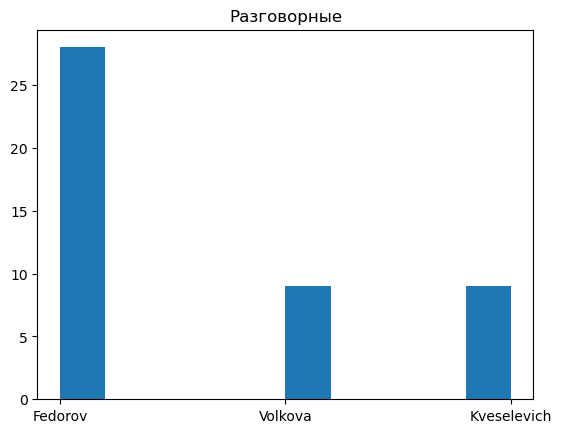

In [120]:
x = [res['разг'] for res in abbr_authors.values()]
x = [j for i in x for j in i]
y = [res['книжн'] for res in abbr_authors.values()]
y = [j for i in y for j in i]
plt.hist(x)
plt.title('Разговорные')

Text(0.5, 1.0, 'Книжные')

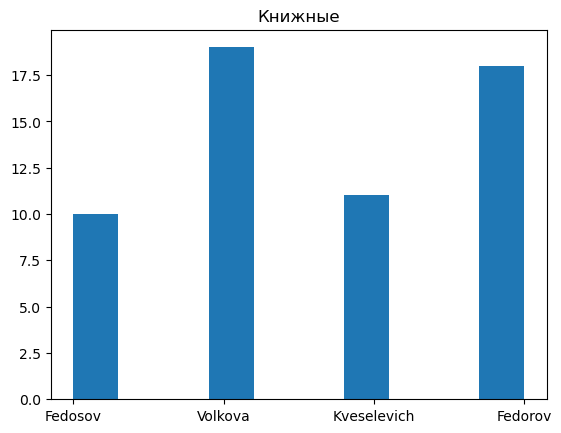

In [121]:
plt.hist(y)
plt.title('Книжные')

In [136]:
print('Fedorov: ', len([res for res in abbr_authors.values() if 'Fedorov' in res['разг'] and 'Fedorov' in res['книжн']]))
print([name for name, res in abbr_authors.items() if 'Fedorov' in res['разг'] and 'Fedorov' in res['книжн']])
print('Fedosov: ', len([res for res in abbr_authors.values() if 'Fedosov' in res['разг'] and 'Fedosov' in res['книжн']]))
print('Volkova: ', len([res for res in abbr_authors.values() if 'Volkova' in res['разг'] and 'Volkova' in res['книжн']]))
print('Kveselevich: ', len([res for res in abbr_authors.values() if 'Kveselevich' in res['разг'] and 'Kveselevich' in res['книжн']]))

Fedorov:  7
['во сто крат', 'класть жизнь', 'на стража', 'накаливать атмосфера', 'несть число', 'совлекать с путь', 'становиться вставать в поза']
Fedosov:  0
Volkova:  0
Kveselevich:  0


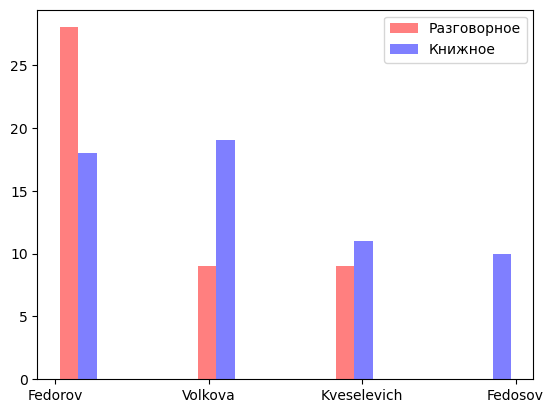

In [127]:
import seaborn as sns
plt.hist([x, y], color=['r','b'], alpha=0.5)
plt.legend(['Разговорное', 'Книжное'])